# 02 - PCA (Dimensionality Reduction)
Compute principal components, choose the optimal number via explained variance, and visualize results.


In [ ]:
# Change working directory
import os
os.chdir(r'D:\Books and Courses\Machine Learning\Sprints x Microsoft Summer Camp - AI and Machine Learning\Comprehensive Machine Learning Full Pipeline on Heart Disease UCI Dataset (Graduation Project)\Heart_Disease_Project')

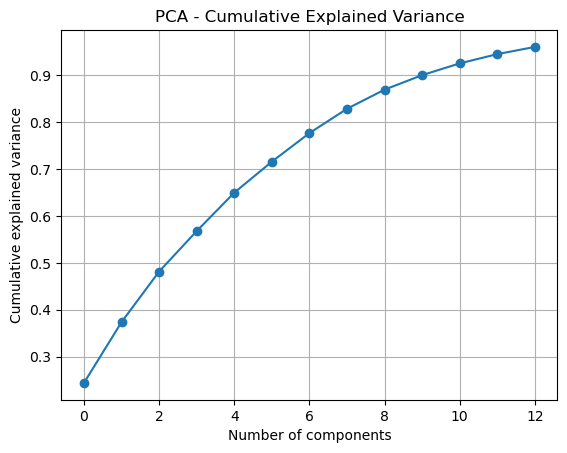

n_components chosen: 13


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA

# Load cleaned training data
train_npz = Path('data/cleaned_train.npz')
arr = np.load(train_npz)
X, y = arr['X'], arr['y']

# Keep 95% variance by default using PCA
pca = PCA(n_components=0.95, svd_solver='full')
X_pca = pca.fit_transform(X)

# Cumulative explained variance plot for PCA
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure()
plt.plot(cum_var, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

print('n_components chosen:', pca.n_components_)

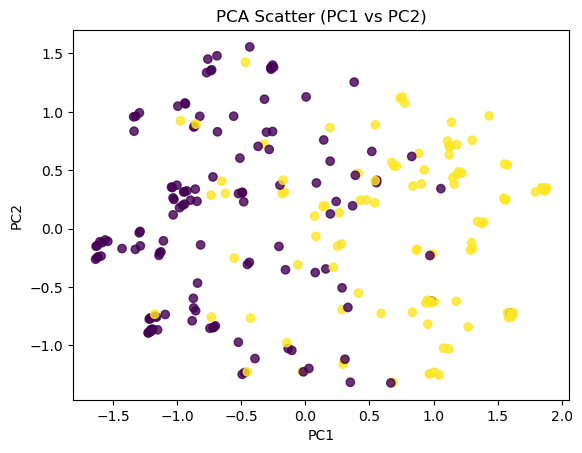

Saved: data/pca_train.npz


In [ ]:
# 2D scatter of first two PC
if pca.n_components_ >= 2:
    plt.figure()
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y, alpha=0.8)
    plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA Scatter (PC1 vs PC2)')
    plt.show()

# Save the PCA transformed dataset
np.savez('data/pca_train.npz', X=X_pca, y=y)
print('Saved: data/pca_train.npz')
